In [1]:
''' 
This program presents a revised methodology for calculating transmittance for the case where we have one Helmholtz resonator centered in each arm of a three
port demultiplexer. The methodology is adapted from T. Gu et al "Induced transparency based subwavelength acoustic demultiplexer" and primarily uses equations 8, 
2, 18, 20, 21, and 22. For this work, the portion of the arm containing the three port demultiplexer is broken into five matrices which have 
their transmittance calculated as t_hr_B1 or t_hr_B2 depending on the arm branch considered. TLA and TLB in this work contain the region preceding the Helmholtz 
resonator minus one centimeter before its neck. Within the context of Gu et als work, t_hr_B1 can be considered an analog to Tu while TC's analog is t_hr_B2. 

Authors: Kyle Sprague, Bill Robertson 

Date: June 29, 2022 
''' 

' \nThis program presents a revised methodology for calculating transmittance for the case where we have one Helmholtz resonator centered in each arm of a three\nport demultiplexer. The methodology is adapted from Gu et al "Induced transparency based subwavelength acoustic demultiplexer" and primarily uses equations 8, \n2, 18, 20, 21, and 22. For this work, the portion of the arm containing the three port demultiplexer is broken into five matrices which have \ntheir transmittance calculated as t_hr_B1 or t_hr_B2 depending on the arm branch considered. TLA and TLB in this work contain the region preceding the Helmholtz \nresonator minus one centimeter before its neck. Within the context of Gu et als work, t_hr_B1 can be considered an analog to Tu while TC\'s analog is t_hr_B2. \n\nAuthors: Kyle Sprague, Bill Robertson \n\nDate: June 29, 2022 \n'

In [2]:
import numpy as np 
import matplotlib.pyplot as plt  
import math as math
import csv 
import os
import pandas as pd

In [3]:
def t_hr_B1(frequency_list, length_list_B1, surface_area_list_B1, c, S):  
    '''  
    Function that calculates transmission associated with the first branch, which includes a matrix for the region of length 1cm extending inward toward 
    the node of the 3-port demultiplexer and excludes the region extending from the node to this boundary. 
    
    array -- frequency_list: frequencies being considered
    array -- length_list_B1: the length of each region being considered along branch 1 in m
    array -- surface_area_list_B1: the surface area of each region being considered along branch 1  
    c -- speed of sound in m/s 
    
    returns: transmission through the HR-containing region of the first branch as an array
    ''' 
    transmission_list = np.zeros(len(frequency_list))  
    for value in range (len(frequency_list)-1): 
        k = (2*np.pi*frequency_list[value])/c  
        M = np.array([[1,0],[0,1]]) 
        for index in range(len(length_list_B1)):  
            MT = np.array([
                [np.cos(k*length_list_B1[index]), 1j*(c/surface_area_list_B1[index])*np.sin(k*length_list_B1[index])],
                [1j*(surface_area_list_B1[index]/c)*np.sin(k*length_list_B1[index]), np.cos(k*length_list_B1[index])]  
            ]) #equation 8 from T Gu et. al   
            M = M@MT  
        A,B,C,D = M[0,0], M[0,1], M[1,0], M[1,1] 
        TP = 2/(abs(A + B*(surface_area_list_B1[index]/c) + C*(c/surface_area_list_B1[index]) + D)) #equation 2 from Gu et. al 
         #equation 2 from T Gu et. al
        transmission_list[value] = (np.abs(TP)**2)  

    return transmission_list

In [4]:
def t_hr_B2(frequency_list, length_list_B2, surface_area_list_B2, c, S):  
    '''  
    Function that calculates transmission associated with the second branch, which includes a matrix for the region of length 1cm extending inward toward 
    the node of the 3-port demultiplexer and excludes the region extending from the node to this boundary. 
    
    array -- frequency_list: frequencies being considered  
    array -- length_list_B2: the length of each region being considered along branch 2 in m
    array -- surface_area_list_B2: the surface area of each region being considered along branch 2  
    c -- speed of sound in m/s 
    
    returns: transmission through the HR-containing region of the second branch as an array
    ''' 
    transmission_list = np.zeros(len(frequency_list))  
    for value in range (len(frequency_list)-1): 
        k = (2*np.pi*frequency_list[value])/c  
        M = np.array([[1,0],[0,1]]) 
        for index in range(len(length_list_B2)):  
            MT = np.array([
                [np.cos(k*length_list_B2[index]), 1j*(c/surface_area_list_B2[index])*np.sin(k*length_list_B2[index])],
                [1j*(surface_area_list_B2[index]/c)*np.sin(k*length_list_B2[index]), np.cos(k*length_list_B2[index])]  
            ])    
            M = M@MT  
        A,B,C,D = M[0,0], M[0,1], M[1,0], M[1,1] 
        TP = 2/(abs(A + B*(surface_area_list_B2[index]/c) + C*(c/surface_area_list_B2[index]) + D)) 
        #TP is equation 2 from T. Gu et al. 
        transmission_list[value] = (np.abs(TP)**2)

    return transmission_list

In [5]:
def r_hr_B1(frequency_list, length_list_B1, surface_area_list_B1, c, S): 
    '''  
    Function that calculates reflectivity associated with the first branch, which includes a matrix for the region of length 1cm extending inward toward 
    the node of the 3-port demultiplexer and excludes the region extending from the node to this boundary. 
    
    array -- frequency_list: frequencies being considered 
    array -- length_list_B1: the length of each region being considered along branch 1 in m
    array -- surface_area_list_B1: the surface area of each region being considered along branch 1  
    c -- speed of sound in m/s 
    
    returns: reflectivity through the HR-containing region of the first branch as an array
    ''' 
    reflectivity_list = np.zeros(len(frequency_list))  
    for value in range (len(frequency_list)-1): 
        k = (2*np.pi*frequency_list[value])/c  
        M = np.array([[1,0],[0,1]]) 
        for index in range(len(length_list_B1)):  
            MT = np.array([
                [np.cos(k*length_list_B1[index]), 1j*(c/surface_area_list_B1[index])*np.sin(k*length_list_B1[index])],
                [1j*(surface_area_list_B1[index]/c)*np.sin(k*length_list_B1[index]), np.cos(k*length_list_B1[index])]  
            ]) #equation 8 from T. Gu et. al   
            M = M@MT  
        A,B,C,D = M[0,0], M[0,1], M[1,0], M[1,1] 
        
    
        RP = abs((A + B*(surface_area_list_B1[index]/c) - C*(c/surface_area_list_B1[index]) - D)/(A+B*(surface_area_list_B1[index]/c)+ 
                                                                                                  C*(c/surface_area_list_B1[index])+D))  

        # RP is equation 2 from T. Gu et. al
        reflectivity_list[value] = (np.abs(RP)**2) 
    return reflectivity_list    


In [6]:
def r_hr_B2(frequency_list, length_list_B2, surface_area_list_B2, c, S):  
    '''  
    Function that calculates reflectivity associated with the second branch, which includes a matrix for the region of length 1cm extending inward toward 
    the node of the 3-port demultiplexer and excludes the region extending from the node to this boundary. 
    
    array -- frequency_list: frequencies being considered 
    array -- length_list_B2: the length of each region being considered along branch 2 in m
    array -- surface_area_list_B2: the surface area of each region being considered along branch 2 
    c -- speed of sound in m/s 
    
    returns: reflectivity through the HR-containing region of the second branch as an array
    ''' 
    reflectivity_list = np.zeros(len(frequency_list))  
    for value in range (len(frequency_list)-1): 
        k = (2*np.pi*frequency_list[value])/c  
        M = np.array([[1,0],[0,1]]) 
        for index in range(len(length_list_B2)):  
            MT = np.array([
                [np.cos(k*length_list_B2[index]), 1j*(c/surface_area_list_B2[index])*np.sin(k*length_list_B2[index])],
                [1j*(surface_area_list_B2[index]/c)*np.sin(k*length_list_B2[index]), np.cos(k*length_list_B2[index])]  
            ]) #equation 8 from T. Gu et. al   
            M = M@MT  
        A,B,C,D = M[0,0], M[0,1], M[1,0], M[1,1] 
        
        RP = abs((A + B*(surface_area_list_B2[index]/c) - C*(c/surface_area_list_B2[index]) - D)/(A+B*(surface_area_list_B2[index]/c)+ 
                                                                                                  C*(c/surface_area_list_B2[index])+D))  
        #RP is equation 2 from T. Gu et. al 
        reflectivity_list[value] = (np.abs(RP)**2) 
    return reflectivity_list  

In [7]:
def t_la(frequency_list, S, l_a, c): 
    ''' 
    Function that calculates the transmission associated with the l_a region of the first branch. 
    
    array -- frequency_list: the frequencies being considered
    float -- S: the surface area of the l_a region of branch 1 in m^2
    float -- l_a: the length of the l_a region in m   
    c -- speed of sound in m/s
    
    returns: transmission through the l_a region of the first branch as an array
    '''

    transmittance_list =  np.zeros(len(frequency_list), dtype = complex)
   
    for index in range (0, len(frequency_list)):  
        k = (2*np.pi*frequency_list[index])/c 
        MT = np.array([
        [np.cos(k*l_a), 1j*(c/S)*np.sin(k*l_a)],
        [1j*(S/c)*np.sin(k*l_a), np.cos(k*l_a)]  
            ])     
        A,B,C,D = MT[0,0], MT[0,1], MT[1,0], MT[1,1]  
        t_la = 2/(abs(A + B*(S/c) + C*(c/S) + D)) 


        transmittance_list[index] = t_la 
   
    t_la_abs = (np.abs(transmittance_list)**2)

    return t_la_abs

In [8]:
def t_lb(frequency_list, S, l_b, c):  
    
    ''' 
    Function that calculates the transmission associated with the l_b region of the second branch. 
    
    array -- frequency_list: the frequencies being considered
    float -- S: the surface area of the l_b region of branch 2 in m^2
    float -- l_b: the length of the l_b region in m   
    c -- speed of sound in m/s
    
    returns: transmission through the l_b region of the second branch as an array
    '''
    
    transmittance_list =  np.zeros(len(frequency_list), dtype = complex)
   
    for index in range (0, len(frequency_list)):  
        k = (2*np.pi*frequency_list[index])/c 
        MT = np.array([
        [np.cos(k*l_b), 1j*(c/S)*np.sin(k*l_b)],
        [1j*(S/c)*np.sin(k*l_b), np.cos(k*l_b)]  
            ])     
        A,B,C,D = MT[0,0], MT[0,1], MT[1,0], MT[1,1]  
        t_lb = 2/(abs(A + B*(S/c) + C*(c/S) + D)) 


        transmittance_list[index] = t_lb 
   
    t_lb_abs = (np.abs(transmittance_list)**2)
    return t_lb_abs

In [9]:
def calculate_Y(frequency_list, t_hr_B1_list, r_hr_B1_list, t_hr_B2_list, r_hr_B2_list, tla,tlb):    
    
    ''' Function that finds the value of Y (equation 18 in T. Gu et. al.) by looping through an array of frequencies, using the transmittance and reflectivity  
    values at each frequency for a given arm's HR-containing region. These are then used to create a Y_list. 
    
    array -- frequency_list: contains the frequencies being considered
    array -- t_hr_B1_list: transmittance values for the HR-containing region of branch 1 
    array -- t_hr_B2_list: transmittance values for the HR-containing region of branch 2 
    array -- r_hr_B1_list: reflectivities associated with the HR-containing region of branch 1
    array -- r_hr_b2_list: reflectivities associated with the HR-containing region of branch 2
    array -- tla: transmittance values for the l_a region of branch 1 
    array -- tla: transmittance values for the l_b region of branch 2 
    
    returns Y as an array
       ''' 

    Y_list = np.zeros(len(frequency_list))
    
    for i in range (len(frequency_list)-1):
        
        Y_num_1 = (1/(tla[i]*t_hr_B1_list[i]))-((r_hr_B1_list[i]*tla[i])/t_hr_B1_list[i]) #one piece of numerator for Y equation given in T Gu et al Induced transparency based #subwavelength acoustic demultiplexers 
        
        Y_num_2 = ((1/(tlb[i]*t_hr_B2_list[i]))-((r_hr_B2_list[i]*tlb[i])/t_hr_B2_list[i]))   
        
        Y_denom_1 = (1/(tla[i]*t_hr_B1_list[i])) +((r_hr_B1_list[i]*tla[i])/t_hr_B1_list[i])   
        
        Y_denom_2 = (1/(tlb[i]*t_hr_B2_list[i]))+((r_hr_B2_list[i]*tlb[i])/t_hr_B2_list[i])   
        
        Y = (Y_num_1/Y_denom_1) + (Y_num_2/Y_denom_2)   
        
        Y_list[i] = Y
    
    return Y_list
    

In [10]:
def calculate_R(frequency_list, Y):  
    
    ''' 
    Function that uses Y to calculate Y in accordance with equation 22 of T. Gu et. al. 
    
        array -- frequency_list: frequencies surrounding the resonant frequency  
        array -- Y: Y values   
        
    returns reflection coefficients for each frequency as an array
    
    '''
    
    R_list = np.zeros(len(frequency_list)) 
    
    for i in range(len(frequency_list)-1): 
        R = (1 - Y[i])/(1 + Y[i]) #equation 22 from T. Gu et. at.
        R_list[i] = R 
    
    return R_list 


In [11]:
def calculate_T1(frequency_list, R, tla, t_hr_B1_list, r_hr_B1_list):  
    
    ''' 
    Function that calculates total transmission along branch 1 of the three port demultiplexer 
    
    frequency_list: frequencies being considered
    R: the reflectivity index  
    array -- tla: list of transmittance values for the l_a region of branch 1  
    array -- t_hr_B1_list: list of transmittance values for the HR-containing region of branch 1  
    array -- r_hr_B1_list: list of reflectivities associated with the HR-containing region of branch 1  
    
    returns: transmission through branch 1 as an array
    '''

    T1_list = np.zeros(len(frequency_list)) 
    
    for i in range(len(frequency_list)-1): 
        T1 = (1+R[i])/(((1)/(tla[i]*t_hr_B1_list[i]))+((r_hr_B1_list[i]*tla[i])/(t_hr_B1_list[i]))) #equation 20 of T. Gu et al
        T1_list[i] = T1
    
    T1_abs = np.abs(T1_list)

    return T1_abs

In [12]:
def calculate_T2(frequency_list, R, tlb, t_hr_B2_list, r_hr_B2_list):  
    
    ''' 
    Function that calculates total transmission along branch 2 of the three port demultiplexer 
    
    frequency_list: the frequencies being considered
    R: the reflectivity index  
    array -- tla: transmittance values for the l_a region of branch 1  
    array -- t_hr_B2_list: transmittance values for the HR-containing region of branch 2 
    array -- r_hr_B2_list: reflectivities associated with the HR-containing region of branch 2  
    
    returns: transmission through branch 2 as an array
    '''

    T2_list = np.zeros(len(frequency_list)) 
    
    for i in range(len(frequency_list)-1): 
        T2 = (1+R[i])/(((1)/(tlb[i]*t_hr_B2_list[i]))+((r_hr_B2_list[i]*tlb[i])/(t_hr_B2_list[i]))) #equation 21 of T. Gu et al. 
        T2_list[i] = T2
    
    T2_abs = np.abs(T2_list) 
    return T2_abs

In [13]:
def hz_to_khz(frequency_list): 
    '''
    This function converts the frequency list to a frequency list in kHz for 
    the purpose of graphing. Note "list"  here is a misnomer; we are actually working with arrays. 
    
    array -- frequency_list: the frequencies being considered
    
    returns: khz_list: array of frequencies from frequency_list converted to kHz
    
    
    '''
    khz_list = np.zeros(len(frequency_list)) 
    for i in range(len(frequency_list)): 
        khz = frequency_list[i]/1000  
        khz_list[i] = khz 
    return khz_list
    

In [14]:

def find_highest_transmission(frequency_list, T): 
    ''' 
    Function that finds the resonant frequency for each HR (depending on whether T1 or T2 is passed in) and determines the resonant
    frequency at the T1 or T2 transmission peak. 
    
    array -- frequency_list: the range of frequencies under consideration 
    array -- T: transmission through branch 1 or 2 as an array 
    
    returns: the resonant frequency as a float for a particular HR in line with a specific branch
    '''
    T_list = T.tolist() 
    max_value = T_list[0]
    for t_value in T_list: 
        if max_value <= t_value: 
            max_value = t_value
            index = T_list.index(max_value)
    resonant_freq = frequency_list[index]
    return resonant_freq
    

In [15]:
def write_function(T1,T2,khz): 
    '''This function writes the T1, T2, and khz) data to a csv file using the writer object.
    
        array -- T1: the transmission through the first branch 
        array -- T2: the transmission through the second branch 
        array -- T3: the transmission through the third branch 
        
        Returns: a csv file titled "Experimental_Results.csv" with T1, T2, and khz data
    '''
    
    
    header = ["Frequency", "Branch 1 Transmission", "Branch 2 Transmission"]
    with open("Experimental_Results.csv", 'w', newline = '') as f: 
        writer = csv.writer(f)
        writer.writerow(header)
        for i in range(len(T1)-1):
            line = [khz[i], T1[i], T2[i]]
            writer.writerow(line)
    f.close() 

In [16]:
def main():  

    S = (0.0052**2)*np.pi #surface area is usually just the surface of the Helmholtz resonator cavity 

    
    frequency_list = np.arange(50, 3500, 0.5)
    
    #key lists 
    
    length_list_B1 = [0.03, 0.02, 0.013, 0.02, 0.10] 
    length_list_B2 = [0.03, 0.02, 0.006, 0.02, 0.10] 
    surface_area_list_B1 = [np.pi*((3.9/(2*100))**2), np.pi*(0.0052**2), np.pi*(0.02**2), np.pi*(0.0052**2), np.pi*((3.9/(2*100))**2)] 
    surface_area_list_B2 = [np.pi*((3.9/(2*100))**2), np.pi*(0.0052**2), np.pi*(0.015**2), np.pi*(0.0052**2), np.pi*((3.9/(2*100))**2)]   
    
    #Calculating transmission through the Helmholtz resonators 
    
    c = 343 #(speed of sound in m/s) 
    
    t_hr_B1_list = t_hr_B1(frequency_list, length_list_B1, surface_area_list_B1, c, S)  
    t_hr_B2_list = t_hr_B2(frequency_list, length_list_B2, surface_area_list_B2, c, S) 
        

    #calculating reflection 
    
    r_hr_B1_list = r_hr_B1(frequency_list, length_list_B1, surface_area_list_B1, c, S) 
    r_hr_B2_list = r_hr_B2(frequency_list, length_list_B2, surface_area_list_B2, c, S) 
        
    #calculating transmission through the section before the Helmholtz Resonator in each arm 
    
    l_a =  0.065 #length before the HR in branch 1 
    l_b = 0.065 #length before the HR in branch 2  

    tla = t_la(frequency_list, S, l_a, c) 
    tlb = t_lb(frequency_list, S, l_b, c) 
    
    #calculating Y 
    
    Y = calculate_Y(frequency_list, t_hr_B1_list, r_hr_B1_list, t_hr_B2_list, r_hr_B2_list, tla, tlb)
    
    R = calculate_R(frequency_list, Y)   
    
    T1 = calculate_T1(frequency_list, R, tla, t_hr_B1_list, r_hr_B1_list)
    T2 = calculate_T2(frequency_list, R, tlb, t_hr_B2_list, r_hr_B2_list) 
    
    
    highest_T1_transmission = find_highest_transmission(frequency_list, T1) #prints index of frequency where max transmission occurs 
    highest_T2_transmission = find_highest_transmission(frequency_list, T2)
    print(f' Resonant frequency for T1 is {highest_T1_transmission}') 
    print(f' Resonant frequency for T2 is {highest_T2_transmission}')
    
    #plotting 
    
    khz = hz_to_khz(frequency_list)
    plt.plot(khz, T1) 
    plt.plot(khz, T2) 
    plt.xlabel("Frequency (kHz)")  
    plt.ylabel("Transmission") 
    
    plt.show 
    
    #theoretical frequency equations are from equation 5 of T. Gu et al. 
    
    theo_resonant_frequency_B1 = (c/(2*np.pi))*np.sqrt(surface_area_list_B1[1]/(length_list_B1[1]*surface_area_list_B1[2]
                                                                                *length_list_B1[2]))
    print(f'The theoretical resonant frequency for T1 is {theo_resonant_frequency_B1}') 
    
    theo_resonant_frequency_B2 = (c/(2*np.pi))*np.sqrt(surface_area_list_B2[1]/(length_list_B2[1]*surface_area_list_B2[2]
                                                                                *length_list_B2[2]))
    print(f'The theoretical resonant frequency for T1 is {theo_resonant_frequency_B2}') 
    
    #write data to a CSV file
    
    write_function(khz, T1, T2)
    

 Resonant frequency for T1 is 1184.0
 Resonant frequency for T2 is 2148.5
The theoretical resonant frequency for T1 is 880.2396467621364
The theoretical resonant frequency for T1 is 1727.5702367253518


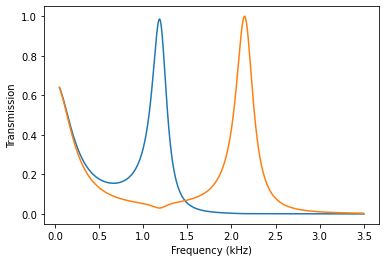

In [17]:
main()